In [25]:
import numpy as np
import PIL
from PIL import Image
import cv2
import os
import IPython.display
import matplotlib.pyplot as plt
files = os.listdir('/tmp/camera-trap/W9A')
files =  ['/tmp/camera-trap/W9A/' + str(f) for f in files]
  

In [3]:


image = Image.open(files[0])

image_data = np.asarray(image)
image_data_blue = image_data[:,:,0]

median_blue = np.median(image_data_blue)

non_empty_columns = np.where(image_data_blue.max(axis=0)>1.5*median_blue)[0]
non_empty_rows = np.where(image_data_blue.max(axis=1)>1.5*median_blue)[0]

boundingBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

print(boundingBox)

(0, 3399, 0, 6079)


In [4]:
img=cv2.imread(files[0])
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
output_img[np.where(mask==0)] = 0

# or your HSV image, which I *believe* is what you want
output_hsv = img_hsv.copy()
output_hsv[np.where(mask==0)] = 0

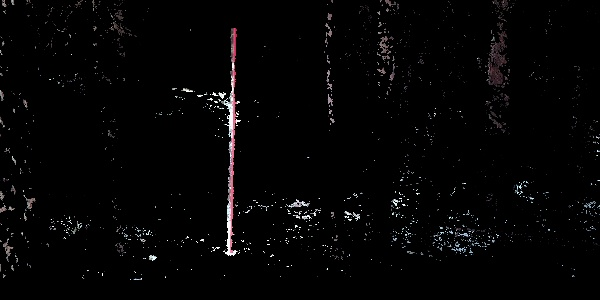

In [40]:
import numpy as np
import cv2

image = cv2.imread(files[1])
result = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower = np.array([170,25,0])
# upper = np.array([200,255,255])

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

#mask = cv2.inRange(image, lower, upper)
result = cv2.bitwise_and(result, result, mask=mask)

width =600 # int(src.shape[1] * scale_percent / 100)
height = 300 # int(src.shape[0] * scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
result = cv2.resize(result, dsize)
    

cv2.imwrite('mask.jpg', mask)
cv2.imwrite('result.jpg', result)

pil_img = IPython.display.Image(filename='result.jpg',width = 600, height = 300)
display(pil_img)

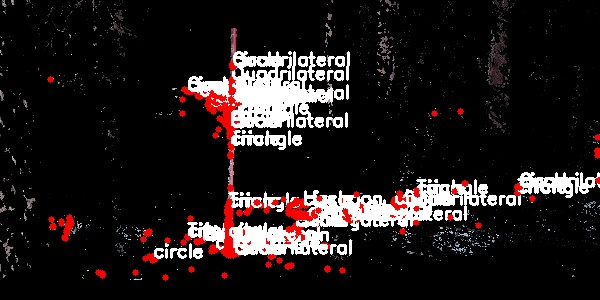

In [48]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
  
# reading image
img = cv2.imread('result.jpg')
  
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
i = 0
  
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  

cv2.imwrite('img.jpg', img)

pil_img = IPython.display.Image(filename='img.jpg',width = 600, height = 300)
display(pil_img)


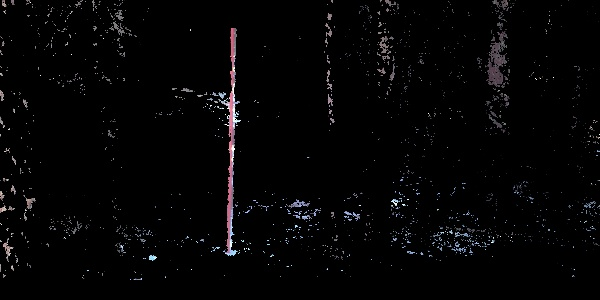

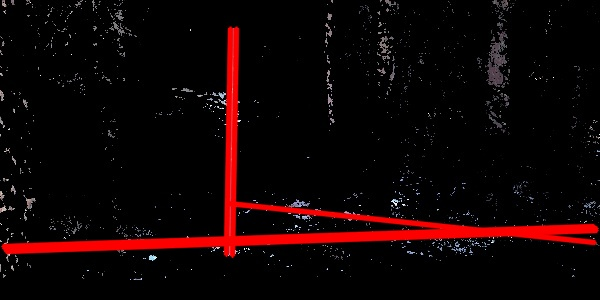

In [53]:
import numpy as np
import cv2

image = cv2.imread(files[8])
result = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower = np.array([170,25,0])
# upper = np.array([200,255,255])

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

#mask = cv2.inRange(image, lower, upper)
result = cv2.bitwise_and(result, result, mask=mask)

width =600 # int(src.shape[1] * scale_percent / 100)
height = 300 # int(src.shape[0] * scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
result = cv2.resize(result, dsize)
    

cv2.imwrite('mask.jpg', mask)
cv2.imwrite('result.jpg', result)

pil_img = IPython.display.Image(filename='result.jpg',width = 600, height = 300)
display(pil_img)


gray = cv2.imread('result.jpg')
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite('edges-50-150.jpg',edges)
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

a,b,c = lines.shape
for i in range(a):
    cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
    cv2.imwrite('img.jpg',gray)

pil_img = IPython.display.Image(filename='img.jpg',width = 600, height = 300)
display(pil_img)

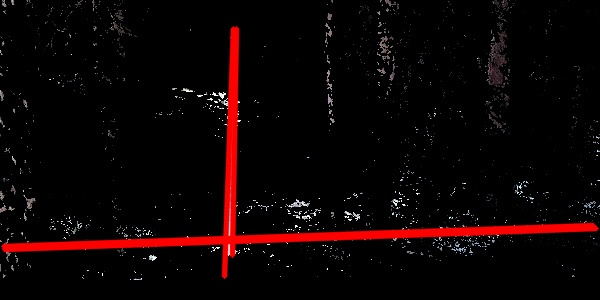